# ALS Project

## SVC

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
%load_ext autoreload
%autoreload 2

## functions

In [32]:
from collections import defaultdict
from scipy.stats import linregress
def linreg_scalers(df, subject_col, y_col, x_col, y_label):
    '''
    creates linear regression slopes, intercepts for every subject in a df.
    input:
        df = df
        subjects_list = list of unique subject names
        subject_col = name of subject id column
        y_col1 = name of first y data column
        x_col = name of column with x values 
    output:
        regression outputs in dataframe
    '''
    slopes = defaultdict()
    
    # list of every subject in table 
    subjects_list = list(np.unique(df[subject_col]))
    
    # for each subject
    for subj in subjects_list:
        data = df.loc[ df[subject_col]==subj].copy()
        y=data[y_col]
        x=data[x_col]

        # if only one record then skip
        if len(data)==1:
            continue
        # if missing values in x or y then skip
        if ~(y.isnull().any())  or (x.isnull().any()):
            y=np.array(y)
            x=np.array(x)
            # linregress is part of scipy.stats. 
            slope, intercept, r_value, p_value, std_err = linregress(x, y)
            slopes[subj] = (y_label, slope, intercept)

    # format as dataframe
    full_result = pd.DataFrame(slopes).transpose().reset_index()
    
    # relabel columns
    s_label = "slope_" + y_label 
    i_label = "intercept_" + y_label
    full_result.rename(index=str, columns={"index": "subject_id", 
                                      0: "test" ,1: s_label, 
                                      2: i_label }, inplace=True)
    
    # make small table
    mini_table = slope_mini_table(full_result.copy(), i_label)
    
    # return table
    return full_result, mini_table

def slope_mini_table(df, i_label):
    df.drop(['test', i_label], axis=1, inplace=True)
    df.dropna(axis=0, inplace=True)
    df.reset_index(drop=True, inplace=True)
    return df

## 

## SVC

In [3]:
svc = pd.read_csv("data/Svc.csv")

In [4]:
print(svc.shape)
svc.head()

(9525, 10)


,subject_id,Subject_Liters_Trial_1,pct_of_Normal_Trial_1,Subject_Liters__Trial_2_,pct_of_Normal_Trial_2,Subject_Liters__Trial_3_,pct_of_Normal_Trial_3,Subject_Normal,Slow_vital_Capacity_Delta,Slow_Vital_Capacity_Units
0,89,3.29,NaN,NaN,NaN,NaN,NaN,3.97,NaN,NaN
1,348,3.00,83.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN
2,348,3.00,81.0,NaN,NaN,NaN,NaN,NaN,4.0,NaN
3,348,3.00,81.0,NaN,NaN,NaN,NaN,NaN,61.0,NaN
4,348,2.00,78.0,NaN,NaN,NaN,NaN,NaN,120.0,NaN


In [6]:
# change Forced_Vital_Capacity_Delta to study day
svc['study_day'] = svc['Slow_vital_Capacity_Delta']
svc.drop('Slow_vital_Capacity_Delta', axis=1, inplace=True)

/Applications/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Applications/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


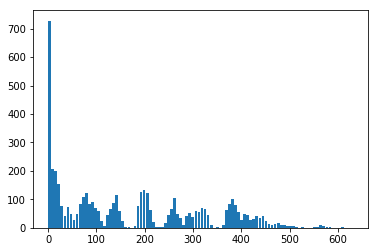

In [7]:
# hist of study days for fvc
plt.hist(svc['study_day'], bins=100, rwidth=0.9)
plt.show()

In [8]:
print(svc.shape)
svc.head()

(9525, 10)


,subject_id,Subject_Liters_Trial_1,pct_of_Normal_Trial_1,Subject_Liters__Trial_2_,pct_of_Normal_Trial_2,Subject_Liters__Trial_3_,pct_of_Normal_Trial_3,Subject_Normal,Slow_Vital_Capacity_Units,study_day
0,89,3.29,NaN,NaN,NaN,NaN,NaN,3.97,NaN,NaN
1,348,3.00,83.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,348,3.00,81.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0
3,348,3.00,81.0,NaN,NaN,NaN,NaN,NaN,NaN,61.0
4,348,2.00,78.0,NaN,NaN,NaN,NaN,NaN,NaN,120.0


### Add onset data

In [9]:
# add the onset date data
onset = pd.read_csv("clean_data/onset_date.csv")

In [10]:
svc_onset = svc.merge(onset, how='left', on='subject_id')

In [11]:
svc_onset['day_since_onset']= np.abs(svc_onset['Onset_Delta']) + svc_onset['study_day']
svc_onset.drop(['Onset_Delta','delta_onset_diag'], axis=1, inplace=True )
print(svc_onset.shape)
svc_onset.head()

(9525, 11)


,subject_id,Subject_Liters_Trial_1,pct_of_Normal_Trial_1,Subject_Liters__Trial_2_,pct_of_Normal_Trial_2,Subject_Liters__Trial_3_,pct_of_Normal_Trial_3,Subject_Normal,Slow_Vital_Capacity_Units,study_day,day_since_onset
0,89,3.29,NaN,NaN,NaN,NaN,NaN,3.97,NaN,NaN,NaN
1,348,3.00,83.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,501.0
2,348,3.00,81.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,505.0
3,348,3.00,81.0,NaN,NaN,NaN,NaN,NaN,NaN,61.0,562.0
4,348,2.00,78.0,NaN,NaN,NaN,NaN,NaN,NaN,120.0,621.0


## Add death day

In [119]:
death = pd.read_csv("clean_data/death_date.csv")
print(death.shape)
death.head()

(8408, 2)


,subject_id,death_day_since_onset
0,89,NaN
1,411,NaN
2,708,1320.0
3,902,NaN
4,1312,NaN


In [14]:
svc_death = svc_onset.merge(death, how='left', on='subject_id')
print(svc_death.shape)
svc_death.head()

(9525, 12)


,subject_id,Subject_Liters_Trial_1,pct_of_Normal_Trial_1,Subject_Liters__Trial_2_,pct_of_Normal_Trial_2,Subject_Liters__Trial_3_,pct_of_Normal_Trial_3,Subject_Normal,Slow_Vital_Capacity_Units,study_day,day_since_onset,death_day_since_onset
0,89,3.29,NaN,NaN,NaN,NaN,NaN,3.97,NaN,NaN,NaN,NaN
1,348,3.00,83.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,501.0,NaN
2,348,3.00,81.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,505.0,NaN
3,348,3.00,81.0,NaN,NaN,NaN,NaN,NaN,NaN,61.0,562.0,NaN
4,348,2.00,78.0,NaN,NaN,NaN,NaN,NaN,NaN,120.0,621.0,NaN


In [19]:
#death_w_svc liters
svc_death_liters = svc_death[['subject_id', 'Subject_Liters_Trial_1', 'day_since_onset', 'death_day_since_onset']].dropna().copy()
print(svc_death_liters.shape)
svc_death_liters.head()


(706, 4)


,subject_id,Subject_Liters_Trial_1,day_since_onset,death_day_since_onset
221,23939,3.0,653.0,1043.0
222,23939,2.0,667.0,1043.0
223,23939,2.0,731.0,1043.0
224,23939,2.0,787.0,1043.0
225,23939,2.0,857.0,1043.0


In [25]:
len(set(svc_death_liters['subject_id']))

146

In [22]:
#death_w_svc percent of normal
svc_death_normal = svc_death[['subject_id', 'pct_of_Normal_Trial_1', 'day_since_onset', 'death_day_since_onset']].dropna().copy()
print(svc_death_normal.shape)
svc_death_normal.head()


(495, 4)


,subject_id,pct_of_Normal_Trial_1,day_since_onset,death_day_since_onset
221,23939,79.0,653.0,1043.0
222,23939,77.0,667.0,1043.0
223,23939,66.0,731.0,1043.0
224,23939,65.0,787.0,1043.0
225,23939,63.0,857.0,1043.0


In [23]:
len(svc_death_normal['subject_id'].unique())

108

In [27]:
#how many the same subject?
len(set(svc_death_normal['subject_id']) & set(svc_death_liters['subject_id']))

108

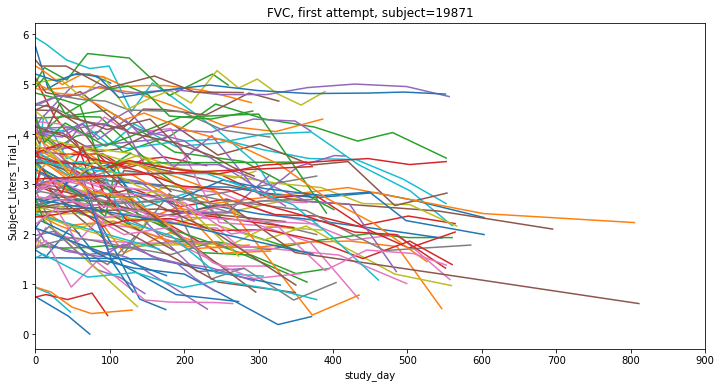

In [368]:
#plot first 100 subjects data 
#fvc_death
subject_list = svc_death['subject_id'].unique()[0:200]
time = 'study_day'
feature = 'Subject_Liters_Trial_1'
xlim=(0,900)
plot_fvc_long(svc_death, feature, time, subject_list, xlim)

any relation between svc and death time

In [ ]:
x = np.array(svc_death_normal['death_day_since_onset'].values)
y = np.array(svc_death_normal['slope_pct_of_Normal_Trial_1'].values)
slope, intercept, r_value, p_value, std_err = linregress(x.astype(float), y.astype(float))
plt.scatter(x, y)
X_plot = np.linspace(0,np.max(x),len(x))
plt.plot(X_plot, X_plot*slope + intercept, color='red')
plt.title('slope_pct_of_Normal_Trial_1')
plt.xlabel('death_day_since_onset')
plt.show()

## SVC miniture linear regressions

In [111]:
# add anchor point at onset for each subject.
# PART 1
feature = 'pct_of_Normal_Trial_1'
subject = 'subject_id'
time = 'day_since_onset'
time_series_df = svc_death.copy()

# make a small table
just_table = time_series_df[[subject, feature, time]].copy()
just_table.dropna(inplace=True)

# group by subject_id
anchor_df = just_table.groupby(subject).count()

# make all values = np.NaN
anchor_df[ anchor_df != np.NaN] = np.NaN

# replace individual scores as needed.
anchor_df[feature].replace(np.NaN, 100, inplace=True)
anchor_df[time].replace(np.NaN,0, inplace=True)

# reset the index (groupby indexed changed)
anchor_df.reset_index(inplace=True)

print(anchor_df.shape)
anchor_df.head()

(461, 3)


,subject_id,pct_of_Normal_Trial_1,day_since_onset
0,348,100.0,0.0
1,1064,100.0,0.0
2,4877,100.0,0.0
3,5918,100.0,0.0
4,11941,100.0,0.0


In [112]:
# merge anchor points with original table
full_anchor_df = pd.concat([just_table, anchor_df], axis=0)
full_anchor_df.sort_values(by=[subject, time], inplace=True)
full_anchor_df.reset_index(drop=True, inplace=True)
print(full_anchor_df.shape)
full_anchor_df.head()

(3657, 3)


,subject_id,pct_of_Normal_Trial_1,day_since_onset
0,348,100.0,0.0
1,348,83.0,501.0
2,348,81.0,505.0
3,348,81.0,562.0
4,348,78.0,621.0


In [113]:
# create linear regressions from the fvc normalized data
subject_col=subject
y_col=feature
x_col=time
y_label = 'svc_normal_onset_slope'

full_result, mini_table = linreg_scalers(full_anchor_df, subject_col, y_col, x_col, y_label)

In [114]:
full_result.head()

,subject_id,test,slope_svc_normal_onset_slope,intercept_svc_normal_onset_slope
0,348,svc_normal_onset_slope,-0.0263194,96.6654
1,1064,svc_normal_onset_slope,-0.0632836,108.818
2,4877,svc_normal_onset_slope,-0.0265544,101.06
3,5918,svc_normal_onset_slope,-0.00034497,102.331
4,11941,svc_normal_onset_slope,7.56994e-05,100.218


In [115]:
print(mini_table.shape)
mini_table.head()

(461, 2)


,subject_id,slope_svc_normal_onset_slope
0,348,-0.0263194
1,1064,-0.0632836
2,4877,-0.0265544
3,5918,-0.00034497
4,11941,7.56994e-05


In [116]:
# save to csv
filename = 'clean_data/svc_normal_onset_slope.csv'
mini_table.to_csv(filename, index=False)

In [120]:
# are svc slopes associated with death in this subset?
# add the death_day_since_onset to table
svc_normal_slope_death = full_result.merge(death, how='left', on='subject_id')
svc_normal_slope_death.dropna(inplace=True)
print(svc_normal_slope_death.shape)
svc_normal_slope_death.head()

(108, 5)


,subject_id,test,slope_svc_normal_onset_slope,intercept_svc_normal_onset_slope,death_day_since_onset
10,23939,svc_normal_onset_slope,-0.0429508,101.451,1043.0
15,34957,svc_normal_onset_slope,-0.0214287,108.207,830.0
20,43725,svc_normal_onset_slope,-0.175974,103.562,581.0
23,48616,svc_normal_onset_slope,-0.048908,101.494,933.0
26,52510,svc_normal_onset_slope,-0.044634,101.334,831.0


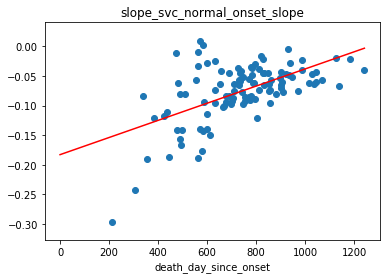

In [123]:
x = np.array(svc_normal_slope_death['death_day_since_onset'].values)
y = np.array(svc_normal_slope_death['slope_svc_normal_onset_slope'].values)
slope, intercept, r_value, p_value, std_err = linregress(x.astype(float), y.astype(float))
plt.scatter(x, y)
X_plot = np.linspace(0,np.max(x),len(x))
plt.plot(X_plot, X_plot*slope + intercept, color='red')
plt.title('slope_svc_normal_onset_slope')
plt.xlabel('death_day_since_onset')
plt.show()

rmse poly 0.03739962422444961
r2 poly 0.42082438430305313


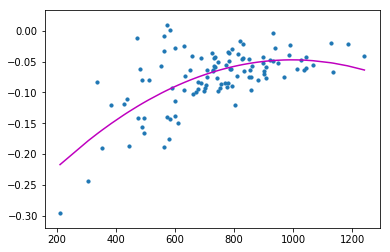

In [136]:
import operator
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

x=np.array(svc_normal_slope_death['death_day_since_onset'].values).reshape(-1,1)

polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(x)

model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)

rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
r2 = r2_score(y,y_poly_pred)
print("rmse poly {}".format(rmse))
print("r2 poly {}".format(r2))

plt.scatter(x, y, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)
plt.plot(x, y_poly_pred, color='m')
plt.show()